## Követelmények
***
### Röpzh
Minden óra végén fel lesz adva néhány egyszerű, lényegretörő kérdés az adott óra anyagából.

#### Értékelés
Minden feladat **1 pontot** ér a végső elszámolásban. Röpzh-kból összesen **10 pont** szerezhető majd.

### Házi feladat
A házi feladatok elkészítésére mindig **3 hetetek** lesz, beküldés után pedig még van lehetőség javítani a visszaküldött feladatokon. Az első változatot azonban a feladástól számított **két héten belül** várjuk, javítani csak ekkor lehet a visszaküldött feladatokon. <br/>
A notebookoknak hozzatok létre egy saját Google Drive mappát, és állítsátok be, hogy ezt a megosztó link birtokában bárki megtekinthesse. A notebookhoz tartozó linket és a html fájlt az óra Teams csoportjába kell majd feltölteni.

#### Értékelés
Az összesen 6 db házi feladatból **4 db hibátlan visszaküldése feltétele az elégséges jegynek**. Minden további visszaküldött házi feladat feladatonként **1-1 pontot** ad a végső elszámoláshoz.

### Projektmunka
A félév második felében két-háromfős csoportokban adatbányászati feladatokat fogtok megoldani. Erről a félév végén le kell adni egy legalább ötoldalas **dokumentációt**, valamint az utolsó héten **prezentálnotok** kell 7-10 percben az eredményeket. A 8. héten lesz egy bevezető pár perces előadásotok, ahol a bemutatjátok az adathalmazt, megfogalmazzátok a hipotéziseitek.

#### Értékelés
A projektmunkát az elvégzett munka, a leadott dokumentáció és a prezentáció minősége alapján értékelni fogjuk. A szerezhető összpontszám **30 pont**. A pozitív eredmény (hipotézis beigazolása, jó teljesítmény elérése) **nem** feltétele a jó jegynek. Az egész csapat ugyanazt az értékelést kapja, kivéve, ha ezt külön kéritek.

### Összpontszám:
Összesen tehát **40 pont** szerezhető. A jegyek a következőképp alakulnak majd:
- Ha legalább 4 házi feladat el lett fogadva, akkor:
  - 20 pont alatt: elégtelen
  - 20-24 pont: elégséges
  - 25-29 pont: közepes
  - 30-34 pont: jó
  - 35 pont felett: kiváló
- Ha 4-nél kevesebb házi feladatot küldtetek be, akkor a végső jegy elégtelen.

In [1]:
def whats_my_final_grade(projekt_pontszam, ropz_pontszam, elvegzett_hazifeladatok):
  if elvegzett_hazifeladatok < 4:
    return 1
  else:
    pontszam = projekt_pontszam + ropzh + (elvegzett_hazifeladatok - 4)
    jegy = (pontszam - 15) // 5 + 1
    jegy = max([ min(jegy,5), 1 ])
    return jegy

projektmunka = 30 # (pont)
ropzh = 10 # (pont)
hazifeladatok = 6 # (db)

print("Végső jegy: ", whats_my_final_grade(projektmunka, ropzh, hazifeladatok))

Végső jegy:  5


# Adatbányászat gyakorlat 3.
***
Időpont: péntek, 8\:30–10\:00 és 10\:15–11\:45<br/>
Helyszín: 3-107 / 3-111<br/>
Elérhetőségek: TEAMS chat, csoport

# Adatelőkészítés

1. Modellezésben részt nem vevő oszlopok törlése
1. Hiányzó értékek kezelése, sorok elhagyása
1. Megfelelő oszlopok elkódolása
1. Adattáblázat elmentése későbbi használatra



Ha nincs meg a `titanic.csv`:

```
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yasserh/titanic-dataset
!unzip titanic-dataset.zip

df = pd.read_csv("Titanic-Dataset.csv")
df.to_csv("drive/MyDrive/titanic.csv", index=False)
```

In [ ]:
import pandas as pd
pd.__version__

'1.4.4'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/titanic.csv")

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'ParCh', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#df.drop(columns="Unnamed: 0").to_csv("drive/MyDrive/titanic.csv", index=False)

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.15,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.00,A31,C
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.25,NaN,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.00,A14,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.10,E8,S


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   ParCh        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = df.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"])

In [ ]:
df.isna().sum() #Itt összeszámoljuk a hiányos adatokat, kettő is van belőle, mint látjuk

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
ParCh         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df = df.dropna().reset_index(drop=True) #Itt kitöröltük azokat a sorokat, amikben hiányos adatok voltak
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()

values = onehot.fit_transform(df[["Embarked"]]).toarray()
categories = onehot.categories_ #Ez itt pusztán csak kigyűjti nekünk egy tömbbe azt, hogy milyen kategóriái vannak az Embarked-nak

print(categories) #Itt ki is írja

df = df.join(
    pd.DataFrame(
        values,
        columns = ["is_" + cat for cat in categories[0]]
    )
) #Ezzel hozzárakjuk azt a három plusz oszlopot, amit az outputban is látunk: is_C, is_Q és is_S

print(df.columns)

[array(['C', 'Q', 'S'], dtype=object)]
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare',
       'Embarked', 'is_C', 'is_Q', 'is_S'],
      dtype='object')


```
print(df["Embarked"].unique())
for city in df["Embarked"].unique():
  if pd.notna(city): # nézd meg mi történik, ha ezt a feltételt kihagyod
    df[f"is_Embarked_{city}"] = (df["Embarked"] == city).astype("int")
```

In [ ]:
sex2int = {"male": 0, "female": 1}

df = df.replace({
    "Sex": sex2int
})

In [ ]:
#df = df.drop(columns="Embarked")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   ParCh     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
 8   is_C      712 non-null    float64
 9   is_Q      712 non-null    float64
 10  is_S      712 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 61.3+ KB


In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked,is_C,is_Q,is_S
0,0,3,0,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,1,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,1,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,1,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,0,35.0,0,0,8.0500,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,29.1250,Q,0.0,1.0,0.0
708,0,2,0,27.0,0,0,13.0000,S,0.0,0.0,1.0
709,1,1,1,19.0,0,0,30.0000,S,0.0,0.0,1.0
710,1,1,0,26.0,0,0,30.0000,C,1.0,0.0,0.0


In [ ]:
df.to_csv("drive/MyDrive/titanic_preprocessed.csv", index=False)

# 4. gyakorlat: Modellezés

Szeretnénk az adatok alapján megjósolni, hogy egy utas vajon túlélte-e a katasztrófát vagy sem. Ehhez az előző órákon nézegettünk már statisztikákat. Láttuk, hogy a nők és elsőosztályon utazók nagyobb eséllyel élik túl.

Modellezés mindezen megfigyelések észrevételét átadjuk egy klasszifikálónak, tanulja meg ő az észlelhető mintázatokat. Az órán a döntési fákat fogjuk vizsgálni.

**Elmélet**:
Adott egy $X\in\mathbf{R}^{n\times k}$ $n$ mintaméretű, $k$ featuret tartalmazó adathalmazod, és egy $y\in \{0,1\}^{n}$ célváltozó. Célunk olyan $f\in\mathcal{F}$ függvény (modell) találása, amely valamely $\mathcal{L}$ veszteségfüggvényt minimalizál, vagyis egy $p=f(X)$ predikcióra az $\mathcal{L}(y,p)$ veszteség minimális:
$$ f\in\mathcal{F}: \mathcal{L}(y,f(X)) → min! $$
A lehetséges modellek tere jellemzően szűk, ezen az órán például a $\mathcal{F}$ = döntési fák halmaza.

Forrás:
* [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
DecisionTreeClassifier?

In [ ]:
df = pd.read_csv("drive/MyDrive/titanic_preprocessed.csv")
df = df.drop(columns = ["Embarked", "Fare", "is_C", "is_Q", "is_S"])
df

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
707,0,3,1,39.0,0,5
708,0,2,0,27.0,0,0
709,1,1,1,19.0,0,0
710,1,1,0,26.0,0,0


In [ ]:
df.columns
df["Age"] = df["Age"].astype(int)
df

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,0,22,1,0
1,1,1,1,38,1,0
2,1,3,1,26,0,0
3,1,1,1,35,1,0
4,0,3,0,35,0,0
...,...,...,...,...,...,...
707,0,3,1,39,0,5
708,0,2,0,27,0,0
709,1,1,1,19,0,0
710,1,1,0,26,0,0


In [ ]:
df["Survived"].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [ ]:
X, y = df.drop(columns="Survived"), df["Survived"]

In [ ]:
# Itt most rátanulok lineáris regresszióval is, hogy lássam, hogy annak mekkora az accuracy score-ja

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

confusion_matrix(y_test, preds)

ValueError: ignored

In [ ]:
model = DecisionTreeClassifier()
model.fit(X,y)

In [ ]:
preds = model.predict(X)
sum(abs(y-preds))

In [ ]:
confusion_matrix(y,preds)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
plot_tree(model)
plt.show()

In [ ]:
tree = model.tree_
tree.max_depth, len(X)

A $n$ mély döntési fa  leveleinek maximális száma (*kapacitása*) $2^{n-1}$, jelen esetben $2^{19} = 524288$. Ez *jóval* nagyobb mint a $712$-es mintanagyság. Következésképp a modell (ha más faktorok nem szólnának közbe) akár az *egész adathalmazt* megtanulhatná.
Mi azonban nem ezt szeretnénk!

# Keresztvalidáció

Keresztvalidáció (cross validation - CV) alkalmazásával megengedjük a modell kis mértékű _romlását_ annak érdekében, hogy az _általánosítási képessége_ nőjön (ne az adatokra tanuljon rá, hanem egy áltlános _mintát_ találjon meg).

Többféle létezik, de két alapvetőt ismertetünk:
- Holdout method: train-test vágásnak is nevezik, ez a legegyszerűbb. Az adatokból véletlenszerűen leválasztunk egy _teszt_ halmazt, ami nem vesz részt a tanításban. A tanítást a maradék _train_ adathalmazon végezzük el, de a betanított modell kiértékelését a félretett teszt halmazon. A két halmazon nézett performancia különbség (a trainen kell a nagyobb legyen) mutatja a _túltanulás_ mértékét.
  - Előny: gyors, egyszerű
  - Hátrány: biztosítani kell, hogy a két halmaz eloszlása megegyezzen, azaz hasonlítson
- KFold: $k$-rétegű keresztvalidáció során az adatokat $k$ egyenlő részre vágjuk, és a tanítást $k$-szor ismételjük, váltogatva, hogy melyik részt _hagyjuk ki_ a tanításból.
  - Előny: megbízhatóbb eredmény, a performanciának szórása is lesz (mutatja az eredmény megbízhatóságát)
  - Hátrány: lassabb, a $k$ meghatározása önkényes (általában 3 vagy 5)

Források:
- [wikipédia: cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)
- [sklearn: cross validation methods](https://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

In [ ]:
y_train.mean(), y_test.mean() # mennyire hasonló az eloszlásuk

# Klasszifikáció

In [ ]:
model = DecisionTreeClassifier(
    max_depth = 3,
    min_samples_split = 5,
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
preds = model.predict(X_test)
confusion_matrix(y_test, preds) #Ez azt mutatja meg, hogy hány embert jósoltunk meg helyesen. A(1,1): kik azok akik valóban meghaltak és így továb

In [ ]:
plt.figure(figsize=(12,6))
plot_tree(model)
plt.show()

# Teljesítmény mérés

Legyen $C$ a tévesztési mátrix. $C_{ij}$ jelöli ($i,j\in {1,2}$ azon $i$ csoportbeli sorok számát, amikre $j$-t prediktáltunk.  Ezt a követlezőképp szoktunk ábrázolni: N jelöli a negatív osztályt (halottak), P a pozitívat (túlélő); PN a negatívnak prediktáltakat (halottnak várjuk), PP  a pozitívnak prediktáltakat (túlélőnek hisszük). Ezen adatokat az alábbi táblázatba szokás rendelni:

Valós \ Prediktált | Meghaltnak prediktáljuk (PN) | Túlélőnek hisszük (PP) |
--- | :---: | :---: |
Valóban belehalt (N) | TN | FP
Valódi túlélők (P) | FN | TP

Nyilván
- $N+P = PN+PP = n$ az összes adat
- $N=TN+FP$
- $P=FN+TN$
- $PN = TN + FN$
- $PP = FP+TP$.


Az egyes mezők arányai adják a lehetséges metrikák listáját (lásd [wiki: confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)).

Az alábbi metrikákat szokás használni:
- accuracy (pontosság): teljes találati arány
$$ (TN+TP) / (N+P) $$
- precision: a pozitívnak prediktáltak hány százaléka helyes
$$ TP / PP = TP / (FP+PP) $$
- recall: a pozitív osztály hány százalékát találjuk el
$$ TP / P = TP / (FN+TP) $$
- f1 score:  a precision és recall harmonikus közepe
$$ 1 / F1 = \frac{1/PREC + 1/REC}{2} $$

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

In [ ]:
preds = model.predict(X_test)

In [ ]:
display(y_test.values, preds)

In [ ]:
confusion_matrix(y_test, preds)

In [ ]:
accuracy_score(y_test, preds)

In [ ]:
f1_score(y_test, preds)

In [ ]:
precision_score(y_test, preds), recall_score(y_test, preds)

Az eredményeket el is lehet menteni természetesen egy dict-be.

In [ ]:
metrics = {
    "clf": "DecisionTree",
    "params": {
        "max_depth": 3,
        "min_samples_split": 5,
    },
    "acc": accuracy_score(y_test, preds),
    "f1": f1_score(y_test, preds),
    "prec": precision_score(y_test, preds),
    "rec": recall_score(y_test, preds),
}

metrics

# Kidolgozott példák

## Túltanulás

Ha a performancia a train halmazon sokkal nagyobb, mint a teszt halmazon. Ekkor a modell elveszti általánosítási képességét.

Nézük meg, hogyan változik a train-test performancia a mélység növelésével!

In [ ]:
records = []

for depth in range(1,10):
  print("depth: ", depth, end='\r')

  model = DecisionTreeClassifier(
      max_depth = depth,
      random_state = 42
  )
  model.fit(X_train,y_train)

  preds_test = model.predict(X_test)
  preds_train = model.predict(X_train)

  record = {
      "depth": depth,
      "test_acc": accuracy_score(y_test, preds_test),
      "train_acc": accuracy_score(y_train, preds_train),
      "test_f1": f1_score(y_test,preds_test),
      "train_f1": f1_score(y_train,preds_train),
  }
  records.append(record)

metrics = pd.DataFrame().from_records(records)
metrics

In [ ]:
plt.title("Test vs Train metrics")

x = metrics["depth"]

plt.plot(x, metrics["test_acc"], "g:", label="test_acc")
plt.plot(x, metrics["test_f1"], "r:", label="test_f1")
plt.plot(x, metrics["train_acc"], "g-", label="train_acc")
plt.plot(x, metrics["train_f1"], "r-", label="train_f1")

plt.xlabel("depth")
plt.ylabel("score")

plt.legend()
plt.show()

Lusták megoldása az oszlopnevek alapján:

```
for col in metrics.columns:
  if "_" not in col: # skip depth column
    continue
    
  if "test" in col:
    line = ":"
  else:
    line = "-"
  
  if "acc" in col:
    color = "r"
  else:
    color = "g"
  
  style = color+line
  
  plt.plot(metrics[col], style, label=col)

plt.legend()
plt.show()
```



## Paraméter keresés

Általában nem világos előre, hogy melyik paramétert milyen értékre érdemes állítani. Ilyenkor (különböző stratégiákkal) ki szokás próbálni néhány beállítást.

Most nézzük meg, hogy milyen függvénnyel érdemes mérni egy vágás jóságát!

Legyen $\mathbb{P}(y = y_i) = p_i$: egy adott csúcsba jutó adatpontok hányadrésze $y_i$ címkéjű.
* Gini-index:
    $$G(y) = \sum_{i=1}^C p_i (1-p_i)$$
* entrópia vagy logloss:
    $$H(y) = -\sum_{i=1}^C p_i\log p_i$$

Ebben a példában egy 5Fold keresztvalidálást is kidolgozunk.


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
records = []

params = {
    "max_depth" : 3,
    "min_samples_split": 5,
    "random_state" : 42
}

for criterion in ["gini", "log_loss"]:
  cv = KFold(n_splits=5, shuffle=True, random_state=42)

  for fold, (train_index, test_index) in enumerate(cv.split(X)):

    model = DecisionTreeClassifier(
        criterion = criterion,
        **params
    )

    X_tr, y_tr = X.loc[train_index], y[train_index]
    X_te, y_te = X.loc[test_index], y[test_index]

    model.fit(X_tr,y_tr)
    preds = model.predict(X_te)
    score = f1_score(y_te,preds)

    record = {
        "crit": criterion,
        "fold": fold,
        "score": score
    }
    records.append(record)

records

In [ ]:
metrics = pd.DataFrame().from_records(records)
metrics

In [ ]:
metrics.groupby("crit")["score"].agg(["mean","std"])

In [ ]:
metrics.groupby("crit")["score"].agg(["mean","std"]).plot.bar(y="mean", yerr="std", grid=True, ylim=(0.5,1.0))

## Lineáris regresszió

Végezz lineáris regressziót a `Fare` oszlop prediktálására! Az eredményt értékeld ki és ábrázold is valahogy!

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df["Fare"].agg(["min","max","mean","std"])

In [ ]:
X = df.drop(columns=["Fare","Survived"])
y = df["Fare"]

In [ ]:
X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
preds = model.predict(X_test)
print(r2_score(y_test,preds), mean_absolute_error(y_test,preds))

In [ ]:
preds = model.predict(X_test)

plt.figure(figsize=(12,5))
plt.scatter(y_test, preds)

plt.title("Prediction display")
plt.xlabel("actual value")
plt.ylabel("predicted value")

plt.legend(["Fare"])

plt.gca().set_aspect("equal", adjustable="box")
plt.show()

# Feladatok

0. Vizsgáld és értsd meg az előző két kódot.

Döntési fa

1. Hasonlítsd össze a one-hot encode-olt `Embark` modell teljesítményét a label encode-oltéval! Várható-e különbség, ha pl. a `Sex` oszlopot kódolod fordítva?
1. Válassz egy kedvenc numerikus paramétert a `DecisionTreeClassifier` API-jából! Egy ciklusban nézd meg, hogy a paraméter változtatásával (növelésével vagy csökkentésével) hogyan változik az accuracy és f1 score a train és test halmazokon!
1. Próbálj meg 0.9-es accuracyt elérni a test halmazon (`test_size=0.2`)! A kísérleteidet mentsd is el valahogy, hogy visszakereshető legyen (listába, DataFrame-be, stb)! Ha van időd, ábrázold is az eredményeidet! Melyik tűnik a legfontosabb paraméternek a tanítás során?

Bayes-i háló
1. Végezz bináris klasszifikációt a túlélésre [Bayes-i hálóval](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)! Keresztvalidációt először holdout methoddal nézd meg, majd utána vizsgáld meg [KFoldCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)-vel is! Melyik hozott jobb eredményt?

Lineáris regresszió
1. Végezz regularizált regressziót hasonlóan a `Fare` oszlopra! Használhatsz Ridge regressziót, SGDRegressort, ElasticNetet, stb. Értsd meg egy kicsit, miben különbözik a klasszikus regressziótól, majd hasonlítsd össze az eredményeket!
1. A kidolgozott példában azt látod, hogy a valódi értékeket ábrázoljuk a prediktáltakkal szemben. Létezik az ún. predikció error ábrázolás, ahol a valódi értékekkel szemben a predikció hibáját ábrázoljuk. Vagyis ha $p$ a predikció és $y$ a valódi érték, akkor ez az ábrázolás a
$$\phi: y ↦ (p-y). $$
Ekkor a tökéletes modell természetesen nem a 45˚-s egyenesre illeszkedik, hanem a konstans 0-ra. Ábrázold a kapott eredményeket egy ilyen ábrán!




## Otthoni gyakorlás

Ha szeretnél még gyakorolni, ismételd meg ...

1. ... bármely klasszifikációs feladatot  a sklearn [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) modelljével!
1. ... bármely regressziós feladatot egy szabadon választott modellel a `sklearn.linear_model` modulból!


Ha bármikor elakadsz: Tech Support Cheat Sheet ([XKCD, 627](https://xkcd.com/627/))



# Összefoglalás

Mikor gyakoroltál eleget? Ha egy adott modellezési feladat során magabiztosan látod, hogy az adott kérdés
* klasszifikáció vagy regresszió;
* milyen célváltozót kell használj és mely oszlopokat, milyen elkódolással;
* az adatok alapján el tudod dönteni, hogy milyen kerezstvalidációt használj;
* a használt modellt az sklearn API segítségével bármikor meg tudod hívni és betanítani;
* tudod milyen metrikák szerint érdemes kiértékelni a modellt;
* ha szükséges, ábrázolni is tudod.

# Házi feladat

Beküldési határidő:

- Első változat: április 6. 23:59:59
- Utolsó változat: április 13. 23:59:59

Beküldési útmutató:

- Mikor végeztél, mindig futtasd le az újra a kódod, hogy biztos nem maradt-e benne hiba (olyan kódot, ami nem fut le, sajnos nem tudunk elfogadni). Ezt a következőképp teheted meg:
1. Runtime / Restart and run all: újraindítja a sessiont, ha nincs bug a kódban, rendben lefut a végéig.
2. A kimenetekkel együtt töltsd le a notebookot `.ipynb` formátumban a gépedre.
3. A keletkezett `.ipnyb` fájlt töltsd fel a Teams megfelelő feladatához!

## Feladat

**Logisztikus regresszió és hibakeresés**

Logisztikus regresszióval tanuljunk rá a `Survived` oszlopra! Gondold végig, melyik oszlopokat tartod meg, és a megtartottak közül melyiket hogyan kódolod el. Keresztvalidációra holdout módszert használj, 0.2-es test_size-zal.

1. A betanítást először az alapértelmezett értékekkel végezd el. Kapsz egy ConvergenceWarningot. Ha elolvasod, a tábla normalizálását javasolja. Használd a múlt órán tanult modulból az `sklearn.preprocessing.Normalizer`t!
2. Most állítsd át a `penalty`-t elasticnetre, az `l1_ratio` paramétert 0.5-re. Megint hibára futsz. Próbáld kijavítani. Használhatod az API-t és a hibaüzenetet. Kérdés: csak az API elolvasása után már tudtál volna egy működő modellt használni?
3. Próbálgass néhány paraméter beállítást, az eredményeid ábrázold egy oszlopdiagramon. Kiértékelésre használd a kedvenc klasszifikációs metrikádat! Sikerült különböző megoldásokat kapnod?


In [ ]:
# Itt most meghívunk mindent, hogy egyben lássuk a dolgokat
df = pd.read_csv("drive/MyDrive/titanic.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'ParCh', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df = df.drop(columns = ["PassengerId", "Name", "Ticket", "Fare", "Embarked", "Cabin"]) #Kidobjuk azokat az oszlopokat, amik nem annyira érdekesek a túlélés szempontjából
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   ParCh     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [ ]:
# Az óraihoz hasonlóan kitöröljük a hiányos sorokat
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   ParCh     714 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 33.6+ KB


In [ ]:
df.info() # Ahogy azt vártuk, itt már mindenhol egységes az adatok száma

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   ParCh     714 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 33.6+ KB


In [ ]:
encoded_sex = pd.get_dummies(df['Sex']) # Itt elkódoljuk a "Sex" oszlopokat 0-kra és 1-esekre, és két új oszlop lesz belőle, ahogyan azt a dummy változóknál megtanultuk

df = pd.concat([df, encoded_sex], axis=1).drop('Sex', axis=1)

In [ ]:
# Beimportáljuk a megfelelő eszközöket

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Az óraihoz hasonlóan megadjuk neki a tanuló és a teszt adathalmazokat

X, y = df.drop(columns = "Survived"), df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   714 non-null    int64  
 3   ParCh   714 non-null    int64  
 4   female  714 non-null    uint8  
 5   male    714 non-null    uint8  
dtypes: float64(1), int64(3), uint8(2)
memory usage: 23.8 KB


In [ ]:
X.isna().sum() # Itt csak ellenőriztem, hogy biztosan nincsenek-e hiányos adataim

Pclass    0
Age       0
SibSp     0
ParCh     0
female    0
male      0
dtype: int64

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train.mean(), y_test.mean() #Itt megnéztük, hogy mennyire hasonló az eloszlásuk, ez stimmel

(0.4098073555166375, 0.3916083916083916)

In [ ]:
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[71, 16],
       [19, 37]])

In [ ]:
#model = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.5)
#model.fit(X_train, y_train) # Valóban hibára futunk, de megoldásnak azt javasolja, hogy állítsuk át a solvert, így tegyük ezt meg a következőkben

In [ ]:
model = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5)
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
accuracy_score(y_test, preds) # Itt láthajuk, hogy nagyjából 75%-ban jósolta meg jól, hogy egy utas túléli-e a katasztrófát vagy sem

0.7552447552447552

In [ ]:
# Normalizáljuk a táblát

normalizer = Normalizer(norm = 'l2')
normalized_values = normalizer.fit_transform(df)
normalized_df = pd.DataFrame(normalized_values, columns = df.columns) # Ezzel csinálunk egy új Dataframe-et a normalizált adatokból
normalized_df

,Survived,Pclass,Age,SibSp,ParCh,female,male
0,0.000000,0.134840,0.988826,0.044947,0.000000,0.000000,0.044947
1,0.026279,0.026279,0.998618,0.026279,0.000000,0.026279,0.000000
2,0.038152,0.114457,0.991962,0.000000,0.000000,0.038152,0.000000
3,0.028525,0.028525,0.998371,0.028525,0.000000,0.028525,0.000000
4,0.000000,0.085367,0.995943,0.000000,0.000000,0.000000,0.028456
...,...,...,...,...,...,...,...
709,0.000000,0.076053,0.988689,0.000000,0.126755,0.025351,0.000000
710,0.000000,0.073821,0.996588,0.000000,0.000000,0.000000,0.036911
711,0.052414,0.052414,0.995871,0.000000,0.000000,0.052414,0.000000
712,0.038376,0.038376,0.997788,0.000000,0.000000,0.000000,0.038376


In [ ]:
# Most tanuljunk rá erre az új adathalmazra

X, y = normalized_df.drop(columns = ["Survived"]), df["Survived"] # Ha a Survived oszlopot is a normalizált táblából vennénk, akkor folytonosnak minősülne, és nem lehetne rá logisztikus regressziót alkalmazni
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

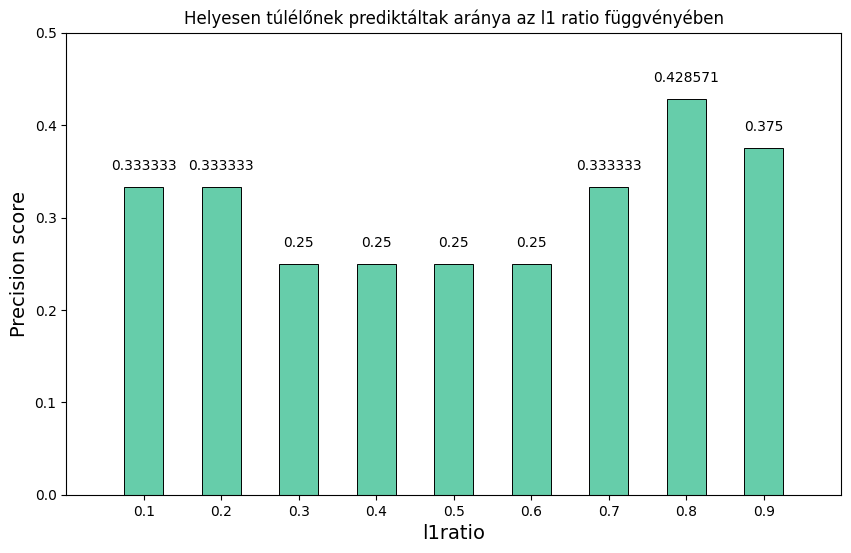

In [ ]:
# Változtassuk kicsit a paramétereket

prec_scores = []

for i in range(1, 10): # Itt először az l1_ratio értékét fogjuk változtatni egy tizedenként, és a precision score-t fogjuk vizsgálni ennek függvényében

  X, y = normalized_df.drop(columns = ["Survived"]), df["Survived"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

  model = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = i/10)
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  prec_scores.append(precision_score(y_test, preds))

x = np.arange(0.1, 1, 0.1)
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, prec_scores, width=0.05, edgecolor = 'black', linewidth = 0.7, color='mediumaquamarine', align='center')

ax.set_xlabel("l1ratio", fontsize = 14)
ax.set_ylabel("Precision score", fontsize = 14)
ax.set_xticks(x)
ax.set_title("Helyesen túlélőnek prediktáltak aránya az l1 ratio függvényében")
ax.set_xlim([0,1])
ax.set_ylim([0, 0.5])

for container in ax.containers:
  ax.bar_label(container, label_type="edge", fontsize = 10, padding = 10)

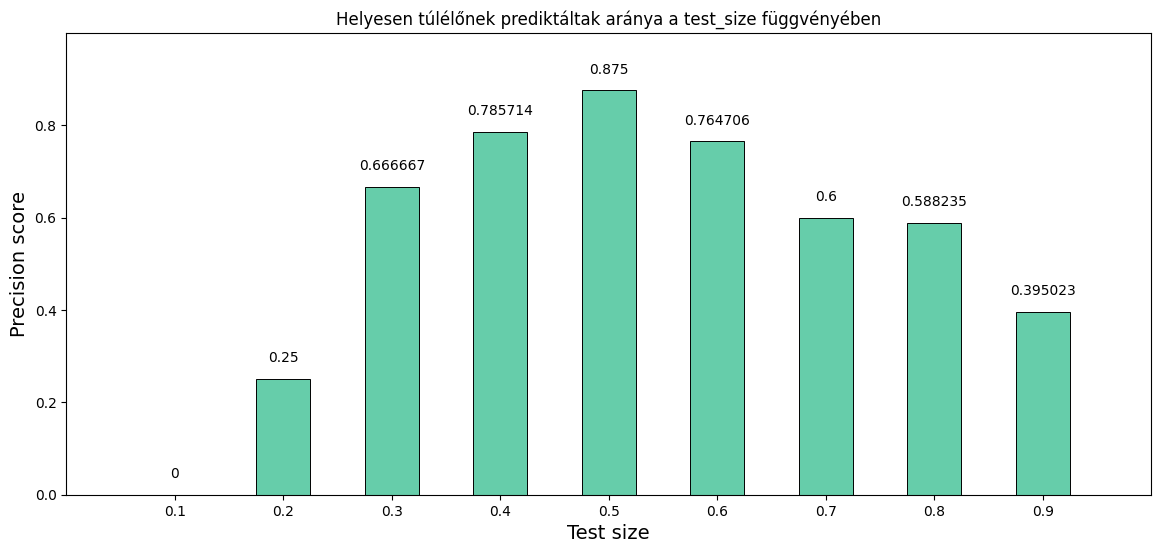

In [ ]:
# test_size változtatása
prec = []
for i in range(10, 100, 10):

  X, y = normalized_df.drop(columns = ["Survived"]), df["Survived"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state = 42)
  model = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5)
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  prec.append(precision_score(y_test, preds))

fig, ax = plt.subplots(figsize=(14,6))
ax.bar(x, prec, width=0.05, edgecolor = 'black', linewidth = 0.7, color='mediumaquamarine', align='center')

ax.set_xlabel("Test size", fontsize = 14)
ax.set_ylabel("Precision score", fontsize = 14)
ax.set_xticks(np.arange(0.1, 1, 0.1))
ax.set_title("Helyesen túlélőnek prediktáltak aránya a test_size függvényében")
ax.set_xlim([0,1])
ax.set_ylim([0, 1])

plt.yticks(np.arange(0, 1, 0.2))

for container in ax.containers:
  ax.bar_label(container, label_type="edge", fontsize = 10, padding = 10)
